In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.xls')

In [2]:
display(cacao.head(10))
cacao.info() 

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [3]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

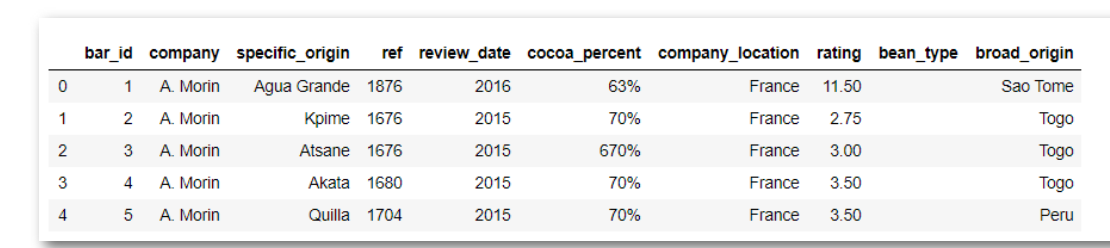

In [4]:
cacao.columns = ['bar_id', 'company',
       'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin']
display(cacao.head(1))

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.5,,Sao Tome


1795


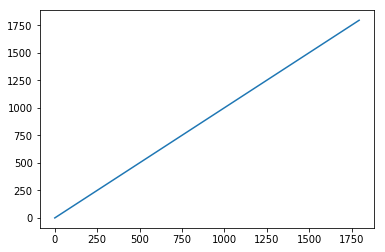

In [5]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [6]:
cacao.drop(['bar_id'], inplace = True, axis = 1)
display(cacao.head(1))

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.5,,Sao Tome


In [7]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Fresco,26
Bonnat,26
Pralus,25
...,...
Malmo,1
Nanea,1
Enric Rovira (Claudio Corallo),1
Svenska Kakaobolaget,1


In [8]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
pd.DataFrame(cacao.company.value_counts())

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Tan Ban Skrati,1
Glennmade,1
Bernachon,1
Monarque,1


In [9]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Tan Ban Skrati,1
Glennmade,1
Bernachon,1
Monarque,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


## specific_origin
Давайте сделаем то же самое для столбца с местом происхождения какао-бобов. 

### Задание 2.3.2

Сколько уникальных регионов в датасете?

In [10]:
cacao.specific_origin.value_counts()

                              58
Madagascar                    55
Peru                          44
Ecuador                       39
Dominican Republic            33
                              ..
Venezuela, batch 122           1
Organic Dark                   1
Canoabo, Hacienda San Jose     1
Belize, med roast              1
Campesino w/ nibs              1
Name: specific_origin, Length: 1013, dtype: int64

In [11]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)
cacao.specific_origin.value_counts()

Madagascar                           55
Peru                                 44
Ecuador                              39
Dominican Republic                   33
Venezuela                            21
                                     ..
Venezuela, batch 122                  1
Organic Dark                          1
Canoabo, Hacienda San Jose            1
Belize, med roast                     1
Zorzal Reserva, 2015 H., Kerchner     1
Name: specific_origin, Length: 1012, dtype: int64

### Задание 2.3.3

Сколько значений, встретившихся в столбце более 10 раз?

In [12]:
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"
      , (cacao.specific_origin.value_counts()>10).sum())

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
...,...
"Venezuela, batch 122",1
Organic Dark,1
"Canoabo, Hacienda San Jose",1
"Belize, med roast",1


Значений, встретившихся в столбце более 10 раз: 15


## ref
Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

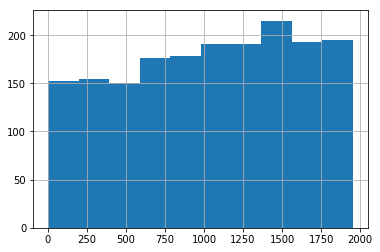

In [13]:
cacao.ref.hist()
cacao.ref.describe()

## review_date
Этот столбец также числовой и у него также нет пропусков. Как ведет себя распределение этого признака?

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

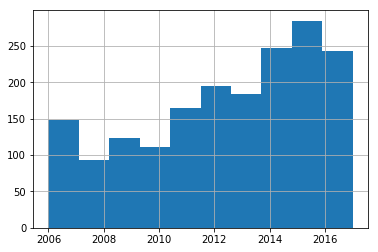

In [14]:
cacao.review_date.hist()
cacao.review_date.describe()

In [15]:
len(cacao.review_date[cacao.review_date <= 2007])

149

## cocoa_percent
Посмотрим на данные в столбце:

In [16]:
cacao.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

Значения в столбцах представлены в виде процентов. Для дальнейшего анализа будет проще, если они будут представлены числами. Трансформируем столбец:

In [17]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

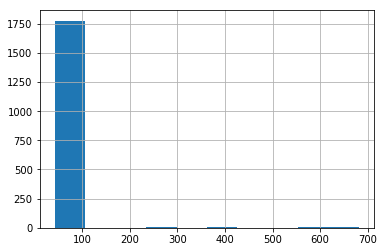

In [18]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

есть потенциальные выбросы свыше 100% (об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


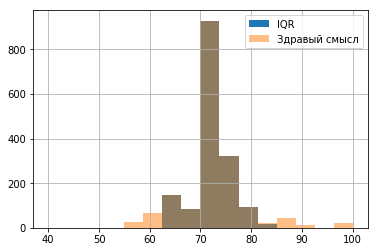

In [19]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [20]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

In [21]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1678 non-null   object 
 1   specific_origin   1718 non-null   object 
 2   ref               1776 non-null   int64  
 3   review_date       1776 non-null   int64  
 4   cocoa_percent     1776 non-null   float64
 5   company_location  1776 non-null   object 
 6   rating            1776 non-null   float64
 7   bean_type         1775 non-null   object 
 8   broad_origin      1775 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 138.8+ KB


## company_location
Посмотрим на данные в столбце страны-производителя:


In [22]:
cacao.company_location.value_counts()

U.S.A.        756
France        155
Canada        124
U.K.           94
Italy          63
             ... 
Niacragua       1
Eucador         1
Martinique      1
Ghana           1
Suriname        1
Name: company_location, Length: 60, dtype: int64

тран намного меньше, чем регионов — всего 60. Стран, у которых больше 10 ревью — целых 22. Пустых значений нет (ура!).

In [23]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Niacragua,1
Eucador,1
Martinique,1
Ghana,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


## rating
Rating — важный столбец, так как именно рейтинг шоколада будет учиться предсказывать будущая модель.

In [24]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

Посмотрим на распределение оценок:

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

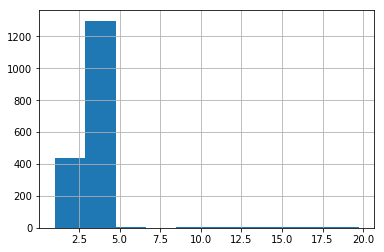

In [25]:
cacao.rating.hist()
cacao.rating.describe()

Как мы видим, большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

Скорее всего была использована пятибалльная шкала оценивания
* В данных есть выбросы.
* Давайте это проверим:

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


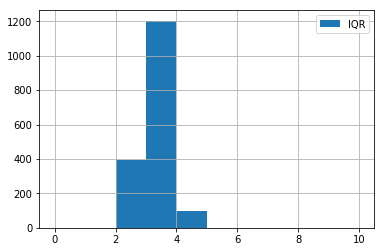

In [26]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:

In [27]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

## bean_type
Сразу заменим пропуски на None:


In [28]:
cacao.bean_type.value_counts()

                            829
Trinitario                  401
Criollo                     147
Forastero                    81
Forastero (Nacional)         50
Criollo, Trinitario          37
Blend                        36
Forastero (Arriba)           30
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        5
Matina                        3
Nacional (Arriba)             3
Beniano                       3
EET                           3
Trinitario, Forastero         2
Criollo (Amarru)              2
Criollo, Forastero            2
Forastero (Catongo)           2
Amazon, ICS                   2
Trinitario (85% Criollo)      2
Criollo (Ocumare 61)          2
Nacional                      2
Amazon mix                    2
Criollo (Ocumare 67)          1
Trinitario, Nacional          1
Criollo, +                    1
CCN51                         1
Blend-Forastero,Criollo       1
Amazon                        1
Foraster

In [29]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [30]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [31]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [32]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cacao.bean_type.nunique())
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
Beniano,3
EET,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


Мы сократили количество уникальных значений в столбце до 21. Пустые значения заполнить не получится, так как есть пять самых популярных (10+ батончиков) сортов какао.

## broad_origin

Самостоятельно обработайте пропуски в этом столбце, заменив их на None, и ответьте на вопросы:

Сколько уникальных значений содержит столбец?
 
Сколько из них встречаются более 10 раз?

In [33]:
cacao.broad_origin.value_counts()

Venezuela                202
Ecuador                  179
Peru                     159
Madagascar               138
Dominican Republic       135
                        ... 
Tobago                     1
Venezuela, Dom. Rep.       1
South America, Africa      1
Ven, Bolivia, D.R.         1
Ghana, Domin. Rep          1
Name: broad_origin, Length: 97, dtype: int64

In [34]:
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [35]:
cacao.broad_origin.value_counts()

Venezuela                202
Ecuador                  179
Peru                     159
Madagascar               138
Dominican Republic       135
                        ... 
Tobago                     1
nan                        1
Venezuela, Dom. Rep.       1
South America, Africa      1
Carribean(DR/Jam/Tri)      1
Name: broad_origin, Length: 97, dtype: int64

In [36]:
(cacao.broad_origin.value_counts()>10).sum()

25

In [37]:
display(cacao.broad_origin)

1            Togo
3            Togo
4            Peru
5       Venezuela
6            Cuba
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: broad_origin, Length: 1690, dtype: object

In [38]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [39]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [40]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"CostRica,Venezuela",1
"DomincanRepublic,Madagascar",1
Nigeria,1
Gabon,1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


# Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

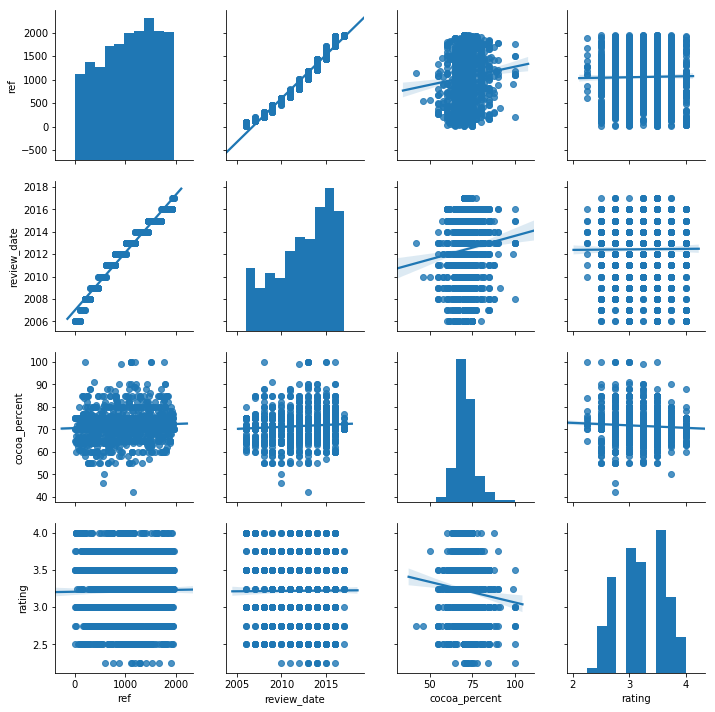

In [41]:
sns.pairplot(cacao, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [42]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

In [43]:
del cacao['ref']

In [44]:
cacao

,company,specific_origin,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1,A. Morin,Kpime,2015,70.0,France,2.75,None,Togo
3,A. Morin,Akata,2015,70.0,France,3.50,None,Togo
4,A. Morin,Quilla,2015,70.0,France,3.50,None,Peru
5,A. Morin,Carenero,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,2014,70.0,France,3.50,None,Cuba
...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,2011,70.0,Austria,3.75,None,Peru
1791,Zotter,Congo,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,2011,62.0,Austria,3.25,None,India


# Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [45]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

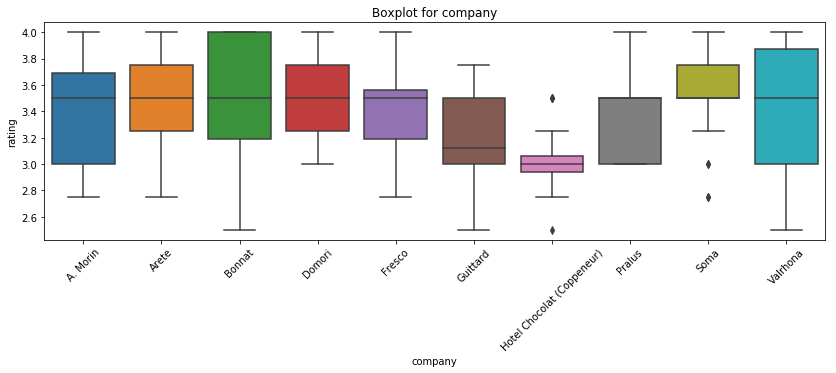

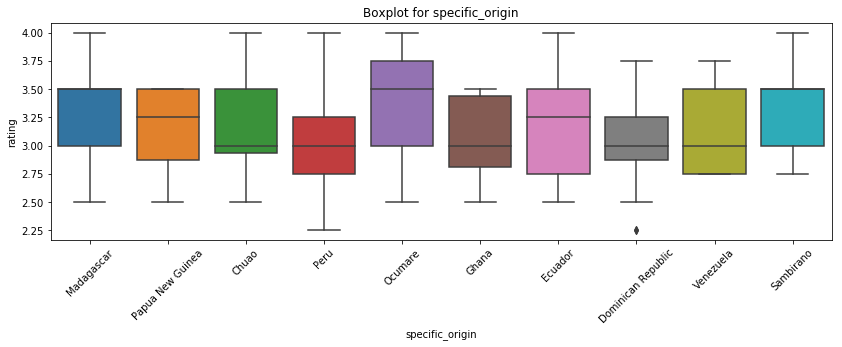

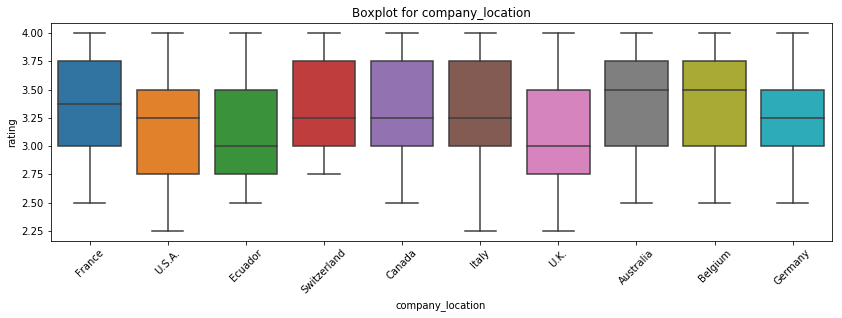

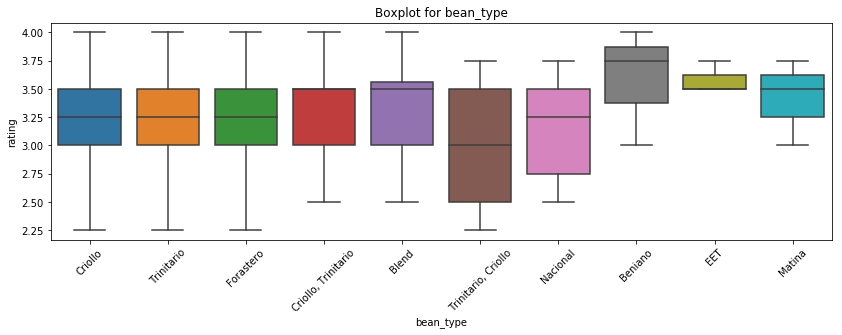

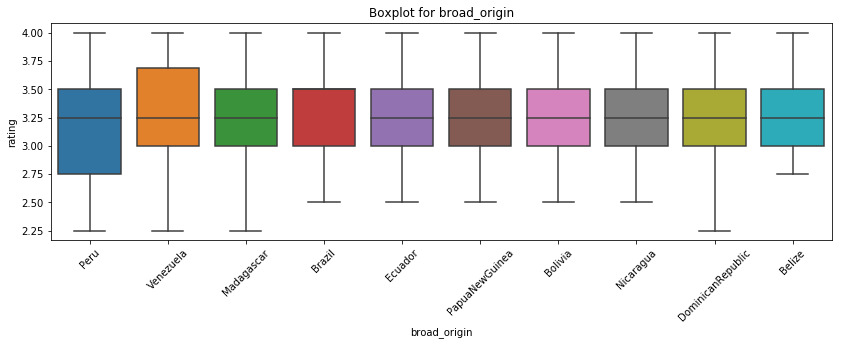

In [46]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

In [49]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [50]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [ ]:
cacao_for_model = cacao.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()